In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('titanic_train.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#There are null values present in Age. We will fill them with median values of Age column

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
si = SimpleImputer(strategy='median')

In [12]:
df['Age'] = si.fit_transform(df[['Age']])

In [13]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#We have filled the null values of Age column with median values

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#There are still null values present in Embarked and Cabin column

In [18]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='count'>

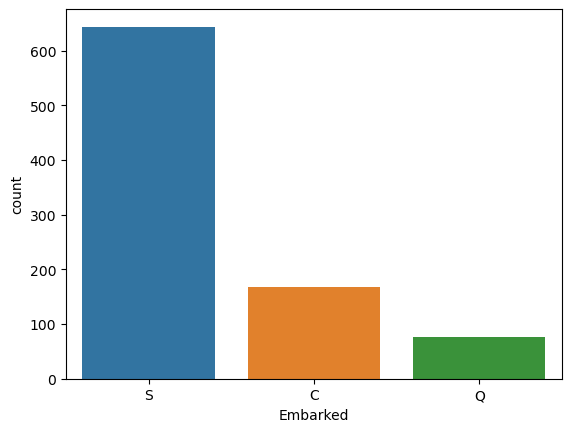

In [21]:
sns.countplot(data=df,x='Embarked')

In [22]:
#We will fill the 2 null values in Embarked column with the most frequently occuring value.

In [23]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
df['Embarked'] = df['Embarked'].fillna(value='S')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [28]:
#Now only Cabin column has null values which is 687 values which is more than 77% values are null

In [29]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

/home/devesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cabin', ylabel='Count'>

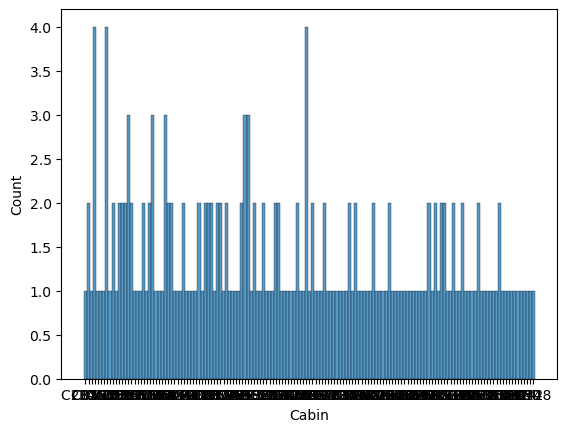

In [30]:
sns.histplot(data=df,x='Cabin')

<Axes: xlabel='Cabin', ylabel='count'>

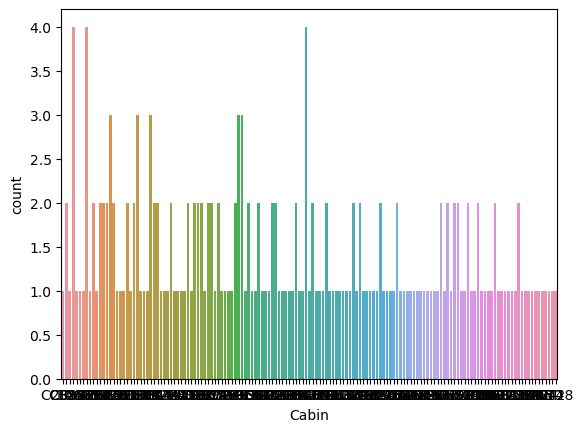

In [31]:
sns.countplot(data=df, x='Cabin')

In [32]:
#We will extract cabin letter 

In [33]:
import re

In [34]:
df['Deck'] = df['Cabin'].map(lambda x: re.findall(r'([a-zA-Z]+)',str(x))[0])
df['Deck']

0      nan
1        C
2      nan
3        C
4      nan
      ... 
886    nan
887      B
888    nan
889      C
890    nan
Name: Deck, Length: 891, dtype: object

In [35]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

In [36]:
df['Deck'] = df['Deck'].map(deck)
df['Deck']

0      NaN
1      3.0
2      NaN
3      3.0
4      NaN
      ... 
886    NaN
887    2.0
888    NaN
889    3.0
890    NaN
Name: Deck, Length: 891, dtype: float64

In [37]:
df['Deck'].fillna(value=0,inplace=True)

In [38]:
df['Deck'] = df['Deck'].astype(int)
df['Deck']

0      0
1      3
2      0
3      3
4      0
      ..
886    0
887    2
888    0
889    3
890    0
Name: Deck, Length: 891, dtype: int64

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Deck         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.drop('Cabin',axis=1,inplace=True)

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,3


<Axes: xlabel='Survived', ylabel='count'>

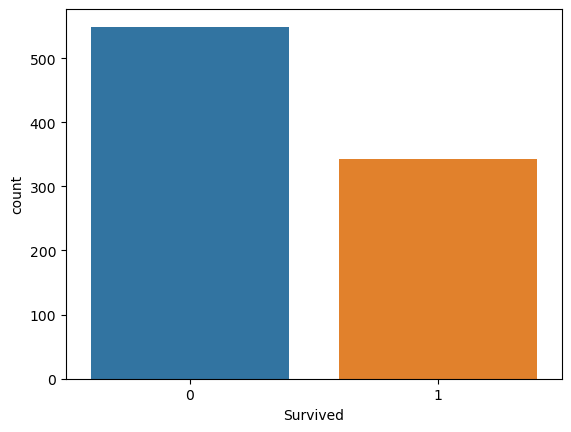

In [44]:
sns.countplot(data=df, x='Survived')

In [45]:
df['Fare'] = df['Fare'].astype(int)

In [46]:
df['Fare']

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Embarked     891 non-null    object 
 11  Deck         891 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


In [48]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [49]:
df['Age'] = df['Age'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    object
 11  Deck         891 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 83.7+ KB


In [51]:
#We will also create a new column consisting of values yes and no which means if a passenger is alone or there are some reltives of the person

In [52]:
df['Relatives'] = df['Parch'] + df['SibSp']

In [53]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23,S,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C,3,0


In [54]:
df['Relatives'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [55]:
#We drop Passenger id as it doesnt have any effect on our target variable

In [56]:
df.drop('PassengerId', axis=1, inplace=True)

In [57]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,3,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S,2,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23,S,0,3
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C,3,0


In [58]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,3,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S,2,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23,S,0,3
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C,3,0


In [59]:
df = pd.get_dummies(data=df,columns=['Sex'],dtype=int,drop_first=True)
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Relatives,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7,S,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71,C,3,1,0
2,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7,S,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53,S,3,1,0
4,0,3,"Allen, Mr. William Henry",35,0,0,373450,8,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13,S,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30,S,2,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28,1,2,W./C. 6607,23,S,0,3,0
889,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30,C,3,0,1


In [60]:
#We will drop Name column as it is irrelevant

In [61]:
df.drop('Name', axis=1, inplace=True)

In [62]:
df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Relatives,Sex_male
0,0,3,22,1,0,A/5 21171,7,S,0,1,1
1,1,1,38,1,0,PC 17599,71,C,3,1,0
2,1,3,26,0,0,STON/O2. 3101282,7,S,0,0,0
3,1,1,35,1,0,113803,53,S,3,1,0
4,0,3,35,0,0,373450,8,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,211536,13,S,0,0,1
887,1,1,19,0,0,112053,30,S,2,0,0
888,0,3,28,1,2,W./C. 6607,23,S,0,3,0
889,1,1,26,0,0,111369,30,C,3,0,1


In [63]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [64]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [65]:
df['Ticket'].nunique()

681

In [66]:
#Ticket values are just numbers and do not have an effect on Survive 

In [67]:
df.drop('Ticket', axis=1, inplace=True)

In [68]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Sex_male
0,0,3,22,1,0,7,S,0,1,1
1,1,1,38,1,0,71,C,3,1,0
2,1,3,26,0,0,7,S,0,0,0
3,1,1,35,1,0,53,S,3,1,0
4,0,3,35,0,0,8,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,S,0,0,1
887,1,1,19,0,0,30,S,2,0,0
888,0,3,28,1,2,23,S,0,3,0
889,1,1,26,0,0,30,C,3,0,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Age        891 non-null    int64 
 3   SibSp      891 non-null    int64 
 4   Parch      891 non-null    int64 
 5   Fare       891 non-null    int64 
 6   Embarked   891 non-null    object
 7   Deck       891 non-null    int64 
 8   Relatives  891 non-null    int64 
 9   Sex_male   891 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 69.7+ KB


In [70]:
df = pd.get_dummies(data=df,columns=['Embarked'],dtype=int,drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Relatives,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,1,0,1
1,1,1,38,1,0,71,3,1,0,0,0
2,1,3,26,0,0,7,0,0,0,0,1
3,1,1,35,1,0,53,3,1,0,0,1
4,0,3,35,0,0,8,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,0,0,1,0,1
887,1,1,19,0,0,30,2,0,0,0,1
888,0,3,28,1,2,23,0,3,0,0,1
889,1,1,26,0,0,30,3,0,1,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Age         891 non-null    int64
 3   SibSp       891 non-null    int64
 4   Parch       891 non-null    int64
 5   Fare        891 non-null    int64
 6   Deck        891 non-null    int64
 7   Relatives   891 non-null    int64
 8   Sex_male    891 non-null    int64
 9   Embarked_Q  891 non-null    int64
 10  Embarked_S  891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


In [72]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [73]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [74]:
#Now our dataset is good

/home/devesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

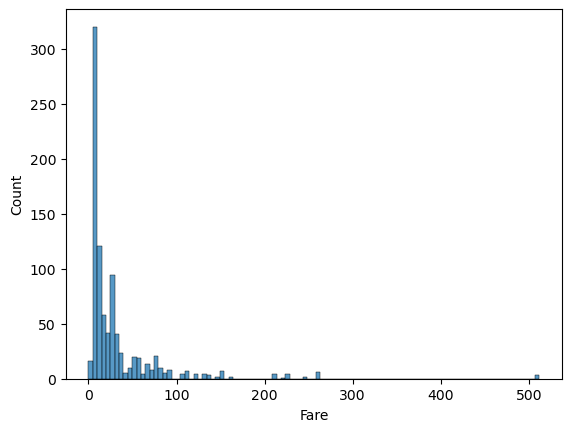

In [75]:
sns.histplot(data=df, x='Fare')

([<matplotlib.patches.Wedge at 0x70acedaab0d0>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')])

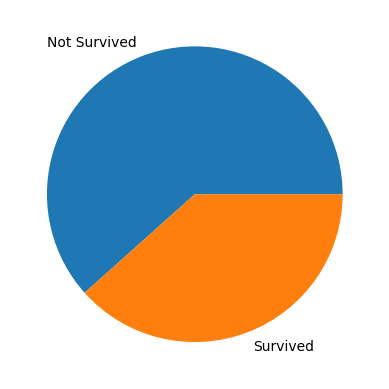

In [76]:
plt.pie(x=df['Survived'].value_counts(),labels=['Not Survived','Survived'])

AttributeError: 'numpy.int64' object has no attribute 'startswith'

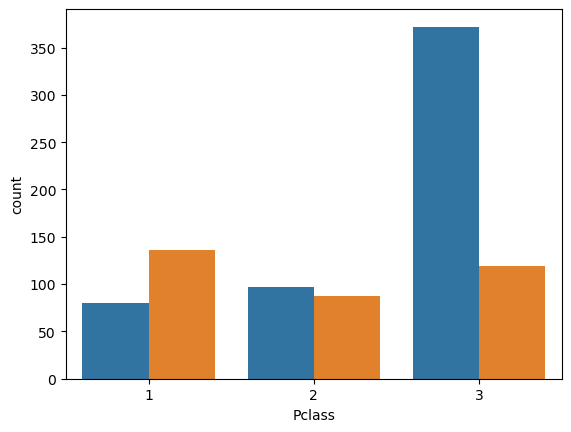

In [77]:
sns.countplot(data=df,x='Pclass',hue='Survived')

In [78]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Relatives,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064909,-0.035322,0.081629,0.257482,0.295812,0.016639,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339999,0.083081,0.018443,-0.550553,-0.568401,0.065997,0.131900,0.221009,0.074053
Age,-0.064909,-0.339999,1.000000,-0.233066,-0.172745,0.097064,0.171030,-0.245593,0.080750,-0.031479,-0.006237
SibSp,-0.035322,0.083081,-0.233066,1.000000,0.414838,0.159506,-0.029635,0.890712,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172745,0.414838,1.000000,0.216252,0.040766,0.783111,-0.245489,-0.081228,0.060814
Fare,0.257482,-0.550553,0.097064,0.159506,0.216252,1.000000,0.341105,0.217052,-0.182331,-0.118319,-0.161341
Deck,0.295812,-0.568401,0.171030,-0.029635,0.040766,0.341105,1.000000,0.000112,-0.149405,-0.107023,-0.041453
Relatives,0.016639,0.065997,-0.245593,0.890712,0.783111,0.217052,0.000112,1.000000,-0.200988,-0.058592,0.077359
Sex_male,-0.543351,0.131900,0.080750,-0.114631,-0.245489,-0.182331,-0.149405,-0.200988,1.000000,-0.074115,0.119224
Embarked_Q,0.003650,0.221009,-0.031479,-0.026354,-0.081228,-0.118319,-0.107023,-0.058592,-0.074115,1.000000,-0.499421


<Axes: >

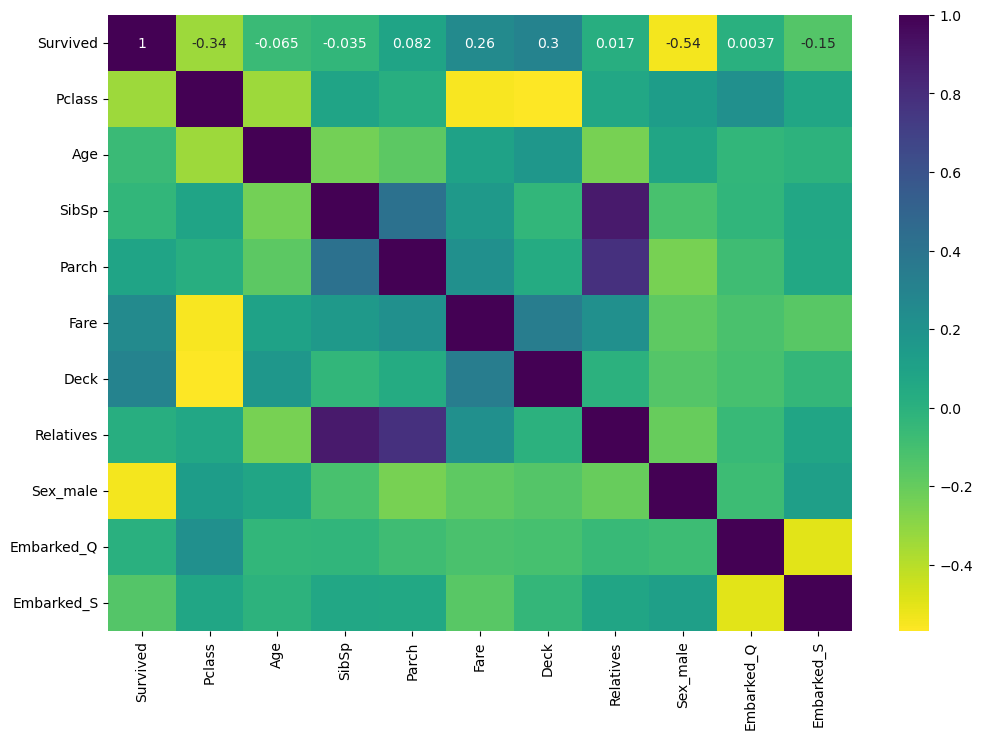

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True,cmap='viridis_r')

In [80]:
X = df.drop('Survived', axis=1)

In [81]:
y = df['Survived']

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [83]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Deck,Relatives,Sex_male,Embarked_Q,Embarked_S
733,2,23,0,0,13,0,0,1,0,1
857,1,51,0,0,26,5,0,1,0,1
81,3,29,0,0,9,0,0,1,0,1
319,1,40,1,1,134,5,2,0,0,0
720,2,6,0,1,33,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
575,3,19,0,0,14,0,0,1,0,1
838,3,32,0,0,56,0,0,1,0,1
337,1,41,0,0,134,5,0,0,0,0
523,1,44,0,1,57,2,1,0,0,0


In [84]:
X_train.shape

(712, 10)

In [85]:
scaler = StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_train

array([[-0.3903107 , -0.48803076, -0.48514639, ...,  0.73334642,
        -0.30335547,  0.60981061],
       [-1.59857688,  1.66305951, -0.48514639, ...,  0.73334642,
        -0.30335547,  0.60981061],
       [ 0.81795547, -0.02708285, -0.48514639, ...,  0.73334642,
        -0.30335547,  0.60981061],
       ...,
       [-1.59857688,  0.89481298, -0.48514639, ..., -1.36361202,
        -0.30335547, -1.6398534 ],
       [-1.59857688,  1.12528694, -0.48514639, ..., -1.36361202,
        -0.30335547, -1.6398534 ],
       [ 0.81795547, -0.1039075 ,  6.58235703, ..., -1.36361202,
        -0.30335547,  0.60981061]])

In [88]:
X_train = pd.DataFrame(X_train, columns=df.columns[1:])

In [89]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Deck,Relatives,Sex_male,Embarked_Q,Embarked_S
0,-0.390311,-0.488031,-0.485146,-0.485634,-0.378699,-0.478315,-0.574366,0.733346,-0.303355,0.609811
1,-1.598577,1.663060,-0.485146,-0.485634,-0.106659,2.716435,-0.574366,0.733346,-0.303355,0.609811
2,0.817955,-0.027083,-0.485146,-0.485634,-0.462404,-0.478315,-0.574366,0.733346,-0.303355,0.609811
3,-1.598577,0.817988,0.398292,0.723357,2.153369,2.716435,0.633754,-1.363612,-0.303355,-1.639853
4,-0.390311,-1.794050,-0.485146,0.723357,0.039824,-0.478315,0.029694,-1.363612,-0.303355,0.609811
...,...,...,...,...,...,...,...,...,...,...
707,0.817955,-0.795329,-0.485146,-0.485634,-0.357773,-0.478315,-0.574366,0.733346,-0.303355,0.609811
708,0.817955,0.203391,-0.485146,-0.485634,0.521127,-0.478315,-0.574366,0.733346,-0.303355,0.609811
709,-1.598577,0.894813,-0.485146,-0.485634,2.153369,2.716435,-0.574366,-1.363612,-0.303355,-1.639853
710,-1.598577,1.125287,-0.485146,0.723357,0.542053,0.799585,0.029694,-1.363612,-0.303355,-1.639853


In [90]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=df.columns[1:])

In [91]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Deck,Relatives,Sex_male,Embarked_Q,Embarked_S
0,-1.598577,1.202112,-0.485146,-0.485634,-0.064807,1.438535,-0.574366,0.733346,-0.303355,0.609811
1,-1.598577,-0.872154,0.398292,-0.485634,4.099505,1.438535,0.029694,-1.363612,-0.303355,-1.639853
2,-1.598577,-0.795329,0.398292,-0.485634,0.458348,2.077485,0.029694,0.733346,-0.303355,0.609811
3,0.817955,-1.794050,-0.485146,0.723357,-0.399626,2.716435,0.029694,0.733346,-0.303355,0.609811
4,-0.390311,-0.103908,-0.485146,-0.485634,-0.650740,-0.478315,-0.574366,0.733346,-0.303355,0.609811
...,...,...,...,...,...,...,...,...,...,...
174,0.817955,-0.103908,-0.485146,-0.485634,-0.504256,-0.478315,-0.574366,0.733346,-0.303355,0.609811
175,0.817955,-0.103908,-0.485146,-0.485634,-0.483330,-0.478315,-0.574366,0.733346,-0.303355,0.609811
176,-1.598577,2.047183,-0.485146,0.723357,1.086134,1.438535,0.029694,-1.363612,-0.303355,-1.639853
177,0.817955,1.432586,-0.485146,-0.485634,-0.504256,-0.478315,-0.574366,0.733346,-0.303355,0.609811


In [92]:
#Now our training data is prepared

In [93]:
logisticregression = LogisticRegression()

In [94]:
logisticregression.fit(X_train,y_train)

LogisticRegression()

In [95]:
logisticregression.intercept_

array([-0.73520474])

In [96]:
logisticregression.coef_

array([[-0.72858157, -0.47759429, -0.2329829 , -0.00172067,  0.09839444,
         0.27047553, -0.1601643 , -1.24517332, -0.06468975, -0.17805785]])

In [97]:
lrpred = logisticregression.predict(X_test)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [99]:
print(classification_report(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.85      0.75      0.79        80

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [100]:
print(confusion_matrix(y_test,lrpred))

[[88 11]
 [20 60]]


In [101]:
print(accuracy_score(y_test,lrpred))

0.8268156424581006


In [102]:
logisticregression.score(X_test,y_test)

0.8268156424581006

In [103]:
#We are getting 82% accuracy with Logistic Regression model

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier(n_estimators=200)

In [106]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [107]:
rfc_pred = rfc.predict(X_test)

In [108]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.82      0.75      0.78        80

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



In [109]:
print(accuracy_score(y_test, rfc_pred))

0.8156424581005587


In [110]:
print(confusion_matrix(y_test,rfc_pred))

[[86 13]
 [20 60]]


In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtc = DecisionTreeClassifier()

In [113]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
dtc_pred = dtc.predict(X_test)

In [115]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        99
           1       0.79      0.66      0.72        80

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [116]:
print(confusion_matrix(y_test,dtc_pred))

[[85 14]
 [27 53]]


In [117]:
accuracy_score(y_test,dtc_pred)

0.770949720670391

In [118]:
from sklearn.svm import SVC

In [119]:
svc = SVC()

In [120]:
svc.fit(X_train,y_train)

SVC()

In [121]:
svc_pred = svc.predict(X_test)

In [122]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        99
           1       0.90      0.69      0.78        80

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



In [123]:
print(confusion_matrix(y_test,svc_pred))

[[93  6]
 [25 55]]


In [124]:
print(accuracy_score(y_test,svc_pred))

0.8268156424581006


In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
gbc = GradientBoostingClassifier()

In [127]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [128]:
gbc_pred = gbc.predict(X_test)

In [129]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        99
           1       0.89      0.72      0.80        80

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



In [130]:
print(confusion_matrix(y_test,gbc_pred))

[[92  7]
 [22 58]]


In [131]:
print(accuracy_score(y_test,gbc_pred))

0.8379888268156425


In [132]:
from xgboost import XGBClassifier

In [133]:
xgbc = XGBClassifier()

In [134]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
xgbc_pred = xgbc.predict(X_test)

In [136]:
print(classification_report(y_test,xgbc_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.86      0.71      0.78        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



In [137]:
print(confusion_matrix(y_test,xgbc_pred))

[[90  9]
 [23 57]]


In [138]:
accuracy_score(y_test,xgbc_pred)

0.8212290502793296

In [139]:
#We can see that Gradient Boosting classfier model gives the best accuracy of 84%

In [140]:
#Now we will use hyper parameter tuning on Gradient Boosting model

In [141]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
grid = GridSearchCV(estimator=gbc,param_grid=param_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)

In [144]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [145]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [146]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                           n_estimators=300)

In [147]:
grid.best_score_

0.8342460356544864

In [148]:
gbc_g = grid.best_estimator_

In [149]:
gbc_g.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                           n_estimators=300)

In [150]:
gbc_g_pred = gbc_g.predict(X_test)

In [151]:
print(classification_report(y_test,gbc_g_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.86      0.70      0.77        80

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [152]:
print(confusion_matrix(y_test,gbc_g_pred))

[[90  9]
 [24 56]]


In [153]:
accuracy_score(y_test,gbc_g_pred)

0.8156424581005587

In [154]:
#We will use Gradient Boosting Classifier as hyperparamter tuning is not yielding better results

In [155]:
import pickle

In [160]:
with open('gbcmodel.pkl','wb') as file:
    pickle.dump(gbc,file)

In [161]:
#Now we will load model

In [163]:
model=pickle.load(open('gbcmodel.pkl','rb'))

In [166]:
X_test.iloc[7].values

array([ 0.81795547, -0.56485542, -0.48514639, -0.48563386, -0.50425645,
       -0.47831516, -0.57436627,  0.73334642, -0.30335547,  0.60981061])

In [167]:
input = [0.82795547, -0.55488542, -0.49517639, -0.48566686, -0.50425645,
       -0.43831516, -0.50436627,  0.73334642, -0.20335547,  0.70981061]

In [168]:
input_data = np.asarray(input).reshape(1,-1)

In [169]:
input_data

array([[ 0.82795547, -0.55488542, -0.49517639, -0.48566686, -0.50425645,
        -0.43831516, -0.50436627,  0.73334642, -0.20335547,  0.70981061]])

In [170]:
model.predict(input_data)

/home/devesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [171]:
#So model is working fine